In [22]:

%pip install keras tensorflow
#Dataset transform: We change parameters with the Illinois dataset.
#Future selection showed that Precipitation, Temperature max and min and Solar radiation are the factors that significantly impact the yield.
# With Adaptive optimizer (ADAM)
#1. Normal dataset: Y=0.75, Yhat= 0.782, MAE = 0.01040  ########################## Y=0.78272 , Yhat=0.865  , MAE= 0.01288
#2. We changed the Solar radiation: Y=0.75, Yhat = 0.756, MAE= 0.01886  ########################## Y=0.78272 ,Yhat= 0.800  , MAE= 0.01726 
#3. We changed the Precipitation: Y=0.75, Yhat = 0.760 , MAE= 0.01995   ########################## Y=0.78272 ,Yhat= 0.807 , MAE= 0.01474
#4. We changed the Min_Temperature: Y=0.75, Yhat = 0.757 , MAE= 0.01677 ########################## Y=0.78272 ,Yhat= 0.791 , MAE=0.01285
#5. We changed the Max_Temperature: Y=0.75, Yhat = 0.752, MAE= 0.01648  ########################## Y=0.78272 ,Yhat= 0.812 , MAE=0.01699 
#6. We changed All the 4 parameters: Y=0.75, Yhat = 0.772 , MAE= 0.01538 ########################## Y=0.78272 ,Yhat= 0.820 , MAE= 0.01382

# With Stochastic Gradient Descent (SGD)
#1. Normal dataset: Y=0.75, Yhat= 0.791, MAE = 0.01564 ########################## Y=0.78272 ,Yhat= 0.896 , MAE= 0.01915
#2. We changed the Solar radiation: Y=0.75, Yhat = 0.772, MAE= 0.02294 ########################## Y=0.78272, Yhat=0.793, MAE=0.02420
#3. We changed the Precipitation: Y=0.75, Yhat = 0.794 , MAE= 0.01483 ########################## Y=0.78272, Yhat=0.821, MAE=0.01723
#4. We changed the Min_Temperature: Y=0.75, Yhat = 0.771 , MAE= 0.01459 ########################## Y=0.78272 ,Yhat= 0.813 , MAE= 0.01605
#5. We changed the Max_Temperature: Y=0.75, Yhat = 0.776, MAE= 0.01629  ########################## Y=0.78272 ,Yhat= 0.826 , MAE= 0.01634
#6. We changed All the 4 parameters: Y=0.75, Yhat = 0.797, MAE= 0.01988 ########################## Y=0.78272 ,Yhat= 0.888 , MAE= 


Note: you may need to restart the kernel to use updated packages.


In [23]:
# plt.figure(9)
# plt.plot(lsIndex, lsSN)
# plt.xlabel('time (day)')
# plt.ylabel('soil nitrogen (gN/m^2d)')
# plt.title('Soil Nitrogen')
# plt.show()

# print('############################# LAI ##########################')
# print(lsLAI)
# print('############################# Grain Values ##########################')

# print('############################# lsNUP ##########################')
# print(lsNUP)

In [24]:
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [29]:

# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
#from keras.optimizers import SGD

In [35]:
# load the dataset
dataset = loadtxt('Data/datas.csv', delimiter=',') #('Dataset_transformAll.csv', delimiter=',') # #('Audrey_Dataset.csv', delimiter=',')
# split into input (X) and output (y) variables
#X = dataset[:,0:7]
#y = dataset[:,7]

In [37]:
###############################################################################################
#Dataset transform: We change parameters with the Illinois dataset.
#Future selection showed that Precipitation, Temperature max and min and Solar radiation are the factors that significantly impact the yield.
#1. Normal dataset: Y=0.75, Yhat= 0.774, MAE = 0.00901
#2. We changed the Solar radiation: Y=0.75, Yhat = 0.785, MAE= 0.01315
#3. We changed the Precipitation: Y=0.75, Yhat = 0.788 , MAE= 0.01014
#4. We changed the Min_Temperature: Y=0.75, Yhat = 0.773 , MAE= 0.01182
#5. We changed the Max_Temperature: Y=0.75, Yhat = 0.763 , MAE= 0.02105
#6. We changed All the 4 parameters: Y=0.75, Yhat = 0.771 , MAE= 0.01477
###############################################################################################


In [39]:
#EXERCICE3

X, y = make_regression(n_samples=181, n_features=7, noise=0.1, random_state=1)
n_train = 75
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(testy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy) 

In [41]:
#EXERCICE3
model = Sequential()
model.add(Dense(20, input_dim=7, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))


H:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
#EXERCICE 3
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [45]:
#EXERCICE 3
# compile model
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.7, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

H:\Anaconda\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [47]:
#EXERCICE 3
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=2)

Epoch 1/100
3/3 - 1s - 185ms/step - loss: 0.9924 - val_loss: 0.5916
Epoch 2/100
3/3 - 0s - 13ms/step - loss: 0.9842 - val_loss: 0.5880
Epoch 3/100
3/3 - 0s - 13ms/step - loss: 0.9715 - val_loss: 0.5804
Epoch 4/100
3/3 - 0s - 13ms/step - loss: 0.9537 - val_loss: 0.5682
Epoch 5/100
3/3 - 0s - 12ms/step - loss: 0.9358 - val_loss: 0.5555
Epoch 6/100
3/3 - 0s - 13ms/step - loss: 0.9137 - val_loss: 0.5431
Epoch 7/100
3/3 - 0s - 14ms/step - loss: 0.8893 - val_loss: 0.5290
Epoch 8/100
3/3 - 0s - 13ms/step - loss: 0.8621 - val_loss: 0.5111
Epoch 9/100
3/3 - 0s - 13ms/step - loss: 0.8291 - val_loss: 0.4901
Epoch 10/100
3/3 - 0s - 13ms/step - loss: 0.7865 - val_loss: 0.4671
Epoch 11/100
3/3 - 0s - 13ms/step - loss: 0.7385 - val_loss: 0.4388
Epoch 12/100
3/3 - 0s - 12ms/step - loss: 0.6845 - val_loss: 0.4053
Epoch 13/100
3/3 - 0s - 13ms/step - loss: 0.6148 - val_loss: 0.3635
Epoch 14/100
3/3 - 0s - 12ms/step - loss: 0.5493 - val_loss: 0.3204
Epoch 15/100
3/3 - 0s - 13ms/step - loss: 0.4745 - val_l

In [48]:
#EXERCICE 3
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

Train: 0.007, Test: 0.010


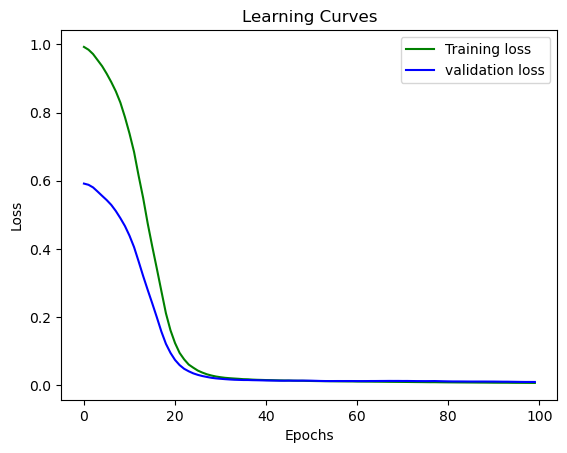

In [49]:
#EXERCICE 3
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], 'g',label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='validation loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [50]:
# # #ESSAI 3  -----OK##################################################
X = dataset[:,0:7]
y = dataset[:,7]
scalarX, scalarY = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,0.75))
scalarX.fit(X)
scalarY.fit(y.reshape(94,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(94,1) 
y = scalarY.transform(y) 

In [55]:
#print(y)

In [57]:
# define the keras model ####OK
model = Sequential()
model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

H:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [59]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.7, nesterov=False) ####OK
#adam=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer=sgd, loss='mean_absolute_error')

H:\Anaconda\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [61]:
# fit the keras model on the dataset REAL DATA
history = model.fit(X, y, epochs=100, batch_size=4, verbose=2, validation_split=0.20)

Epoch 1/100
19/19 - 0s - 20ms/step - loss: 0.0799 - val_loss: 0.6099
Epoch 2/100
19/19 - 0s - 3ms/step - loss: 0.0818 - val_loss: 0.6386
Epoch 3/100
19/19 - 0s - 2ms/step - loss: 0.0767 - val_loss: 0.6215
Epoch 4/100
19/19 - 0s - 2ms/step - loss: 0.0759 - val_loss: 0.6283
Epoch 5/100
19/19 - 0s - 2ms/step - loss: 0.0763 - val_loss: 0.6411
Epoch 6/100
19/19 - 0s - 2ms/step - loss: 0.0755 - val_loss: 0.6225
Epoch 7/100
19/19 - 0s - 2ms/step - loss: 0.0737 - val_loss: 0.6274
Epoch 8/100
19/19 - 0s - 2ms/step - loss: 0.0745 - val_loss: 0.6282
Epoch 9/100
19/19 - 0s - 2ms/step - loss: 0.0723 - val_loss: 0.6129
Epoch 10/100
19/19 - 0s - 3ms/step - loss: 0.0732 - val_loss: 0.5999
Epoch 11/100
19/19 - 0s - 2ms/step - loss: 0.0708 - val_loss: 0.5740
Epoch 12/100
19/19 - 0s - 2ms/step - loss: 0.0732 - val_loss: 0.5894
Epoch 13/100
19/19 - 0s - 2ms/step - loss: 0.0706 - val_loss: 0.5830
Epoch 14/100
19/19 - 0s - 2ms/step - loss: 0.0695 - val_loss: 0.5799
Epoch 15/100
19/19 - 0s - 2ms/step - loss:

In [62]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
MAE: 0.04645


In [65]:
#print(yhat) 

In [67]:
#print(y)

In [69]:
###plt.plot(y)

In [71]:
####plt.plot(yhat)

In [73]:
#####print(yhat-y) 

In [75]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


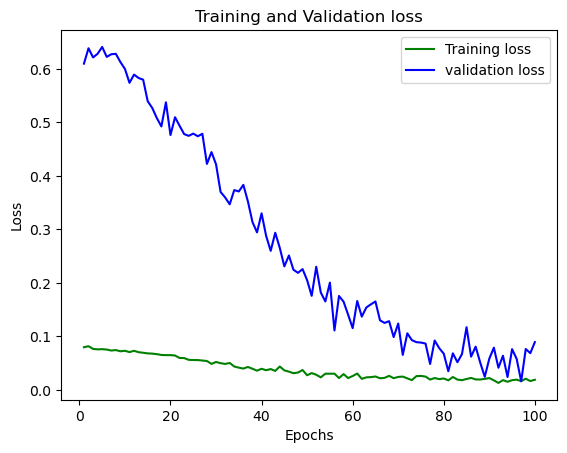

In [77]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()